# Aproximating images with transparent triangles

As my objective function I chose a problem I've seen some time ago when I was playing with genetic algortihms for the first time ([original link](https://rogerjohansson.blog/2008/12/07/genetic-programming-evolution-of-mona-lisa/)). The function is as follows: Given an image `i` and `n`, approximate `i` with `n` transparent triangles such that the byte difference is minimal. Triangle is a 10D vector of 3 pairs of coordinates and a color 4-tuple represetning the RGBA coloring.

### Optimal solution
It is not an easy task to find an optimal solution to an arbitrary input picture, as you don't know whether the number of triangles is sufficient to represent the input picture. I prepared two suites to analyze:
1. manually constructed picture with the number of triangles known
2. funtime approximating my face

## Prep notebook

In [1]:
import sys
import os
pwd = %pwd
sys.path.append(os.path.join(pwd, os.path.join('..', '..', 'src')))

# Ensure modules are reloaded on any change (very useful when developing code on the fly)
%load_ext autoreload
%autoreload 2

In [2]:
from image import TriangleDraw, TriangleMutation, TriangleCrossover
from PIL import Image, ImageDraw

import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
from IPython.display import display

def disp(image: Image, width: int = 400):
    factor = width/image.width
    h = int(image.height * factor)
    image = image.resize((width,h), Image.ANTIALIAS)
    display(image)

In [4]:
from datetime import datetime
print("start", datetime.now())

start 2020-06-06 23:07:46.480599


### Testing suite

In [5]:
test_base_im = Image.new("RGB", (100,100))
test_im_generator = TriangleDraw(test_base_im, 1)

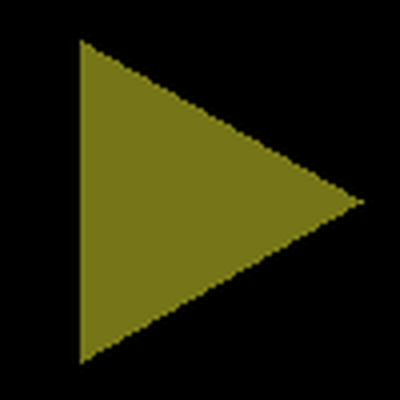

In [6]:
tst1_v = np.array([90,  50,  20,  90,  20,  10,  150, 150,  30, 200])
test1_1_im = test_im_generator.interpret(tst1_v)
test_1_1 = TriangleDraw(test1_1_im, 1)
disp(test1_1_im)

In [7]:
test_base_im = Image.new("RGB", (100,100))
test_im_generator4 = TriangleDraw(test_base_im, 4)

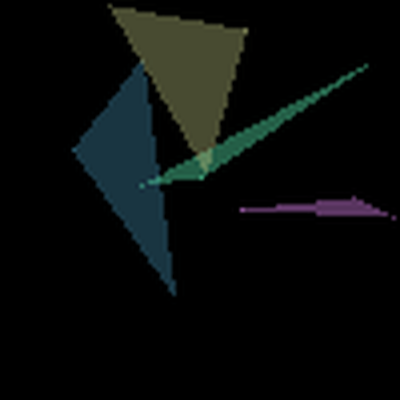

In [8]:
tst4_v = np.array([ 43,  73,  35,  15,  18,  37,  35,  46,  50,  44,
                    91,  16,  60,  52,  88,  49,  98,  54,  61,   7,
                    51,  42,  27,   1,  63, 136, 165, 100,  97, 255,
                   191,  95, 228, 136, 246,  99, 192, 198, 131,  96])
test1_4_im = test_im_generator4.interpret(tst4_v)
test_1_4 = TriangleDraw(test1_4_im, 4)
disp(test1_4_im)

## Shoot and Go

In [10]:
from heur_sg import ShootAndGo

def experiment(of, maxeval, num_runs, hmax, random_descent):
    method = 'RD' if random_descent else 'SD'
    results = []
    for i in tqdm(range(num_runs), 'Testing method={}, hmax={}'.format(method, hmax)):
        result = ShootAndGo(of, maxeval=maxeval, hmax=hmax, random_descent=random_descent).search() # dict with results of one run
        result['run'] = i
        result['heur'] = 'SG_{}_{}'.format(method, hmax) # name of the heuristic
        result['method'] = method
        result['hmax'] = hmax
        results.append(result)
    
    return pd.DataFrame(results, columns=['heur', 'run', 'method', 'hmax', 'best_x', 'best_y', 'neval'])

In [11]:
NUM_RUNS = 10 #TODO change back
MAX_EVAL_1 = 10000
MAX_EVAL_4 = 40000
hmaxes = [0,1,5,20,np.inf]
table = pd.DataFrame()

In [12]:
for hmax in hmaxes:
    res = experiment(of=test_1_1, maxeval=MAX_EVAL_1, num_runs=NUM_RUNS, hmax=hmax, random_descent=False)
    res['of'] = 'test_1'
    res['smol'] = 'smol'
    table = pd.concat([table, res], axis=0)

for hmax in hmaxes:
    res = experiment(of=test_1_1, maxeval=MAX_EVAL_1, num_runs=NUM_RUNS, hmax=hmax, random_descent=True)
    res['of'] = 'test_1'
    res['smol'] = 'smol'
    table = pd.concat([table, res], axis=0)

for hmax in hmaxes:
    res = experiment(of=test_1_1, maxeval=MAX_EVAL_1*10, num_runs=NUM_RUNS, hmax=hmax, random_descent=False)
    res['of'] = 'test_1'
    res['smol'] = 'big'
    table = pd.concat([table, res], axis=0)

for hmax in hmaxes:
    res = experiment(of=test_1_1, maxeval=MAX_EVAL_1*10, num_runs=NUM_RUNS, hmax=hmax, random_descent=True)
    res['of'] = 'test_1'
    res['smol'] = 'big'
    table = pd.concat([table, res], axis=0)

In [13]:
for hmax in hmaxes:
    res = experiment(of=test_1_4, maxeval=MAX_EVAL_4, num_runs=NUM_RUNS, hmax=hmax, random_descent=False)
    res['of'] = 'test_4'
    res['smol'] = 'smol'
    table = pd.concat([table, res], axis=0)

for hmax in hmaxes:
    res = experiment(of=test_1_4, maxeval=MAX_EVAL_4, num_runs=NUM_RUNS, hmax=hmax, random_descent=True)
    res['of'] = 'test_4'
    res['smol'] = 'smol'
    table = pd.concat([table, res], axis=0)

for hmax in hmaxes:
    res = experiment(of=test_1_4, maxeval=MAX_EVAL_4*10, num_runs=NUM_RUNS, hmax=hmax, random_descent=False)
    res['of'] = 'test_4'
    res['smol'] = 'big'
    table = pd.concat([table, res], axis=0)

for hmax in hmaxes:
    res = experiment(of=test_1_4, maxeval=MAX_EVAL_4*10, num_runs=NUM_RUNS, hmax=hmax, random_descent=True)
    res['of'] = 'test_4'
    res['smol'] = 'big'
    table = pd.concat([table, res], axis=0)

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:720: UserWarning: Using the boxplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


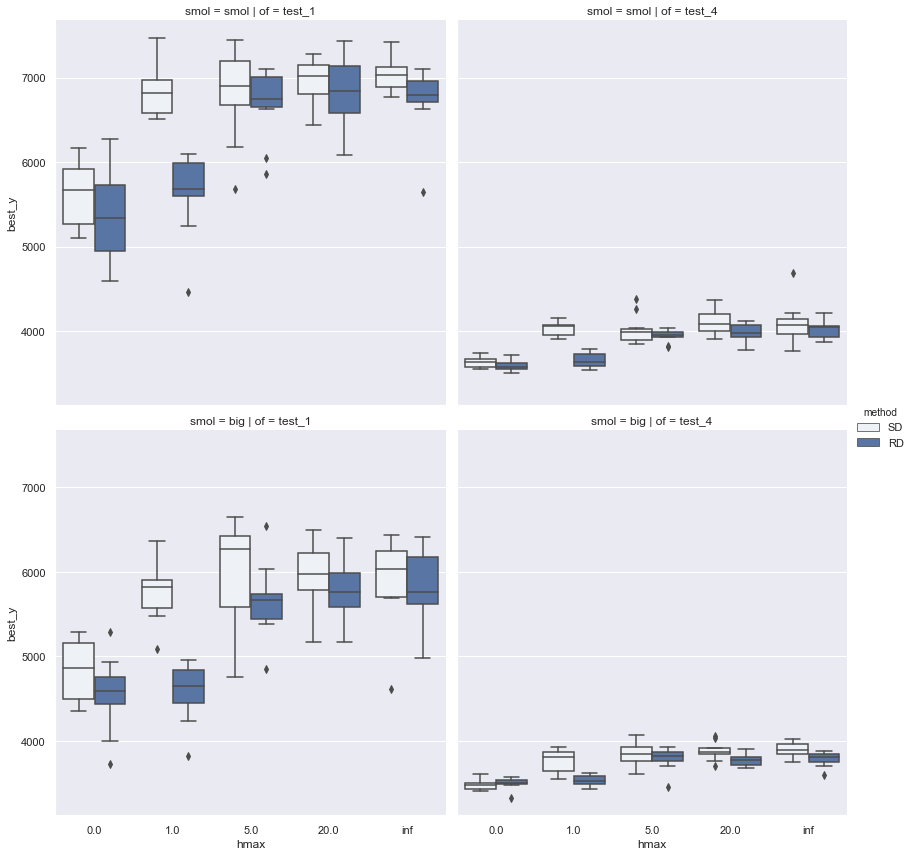

In [14]:
g = sns.FacetGrid(table, col='of', row='smol', height=6)
ax = g.map(sns.boxplot, 'hmax', 'best_y', 'method').add_legend(title='method')

### Example result visualisation

In [15]:
def show_example(r1,r2,of):
    print(r1["best_y"], r2["best_y"])
    disp(of.im)
    disp(of.interpret(r1["best_x"]))
    disp(of.interpret(r2["best_x"]))

In [16]:
ex1_smol = ShootAndGo(test_1_1, maxeval=MAX_EVAL_1, hmax=0).search()
ex1_big = ShootAndGo(test_1_1, maxeval=MAX_EVAL_1 * 10, hmax=0).search()

5904.8966968101995 3930.6035160010733


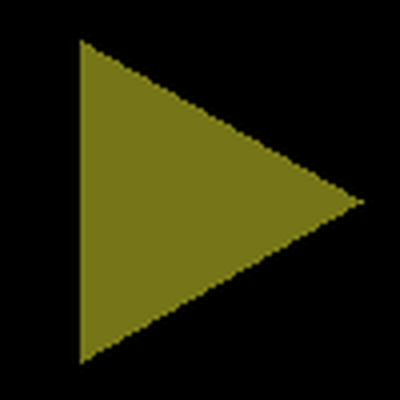

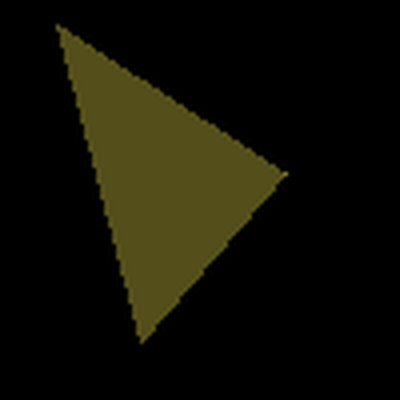

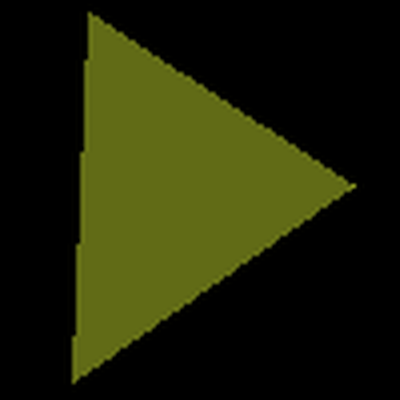

In [17]:
show_example(ex1_smol, ex1_big,test_1_1)

In [18]:
ex4_smol = ShootAndGo(test_1_4, maxeval=MAX_EVAL_4, hmax=0).search()
ex4_big = ShootAndGo(test_1_4, maxeval=MAX_EVAL_4 * 10, hmax=0).search()

3617.5650650679386 3516.1646719117125


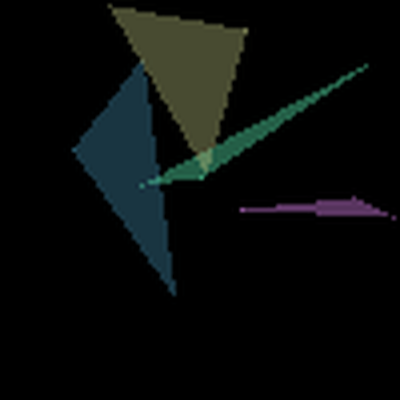

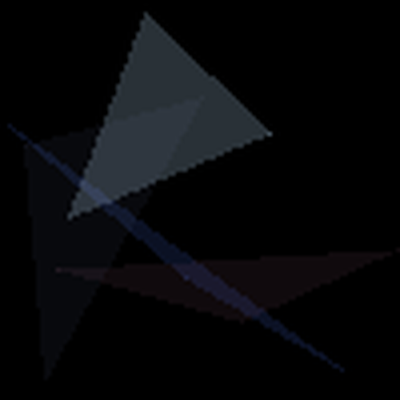

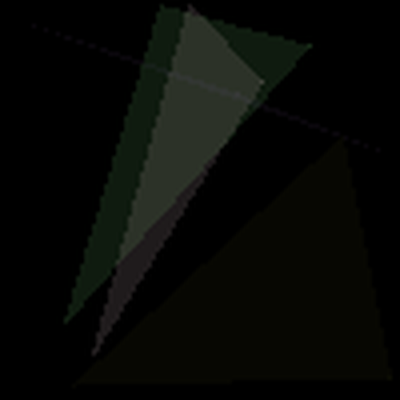

In [19]:
show_example(ex4_smol, ex4_big, test_1_4)

In [20]:
print("checkpoint", datetime.now())

checkpoint 2020-06-07 01:13:13.522549


## GO

In [21]:
from heur_go import GeneticOptimization, UniformMultipoint, Crossover, RandomCombination
from heur_aux import CauchyMutation, MirrorCorrection

In [22]:
def experiment_go(of, maxeval, num_runs, N, M, Tsel1, Tsel2, mutation, crossover):
    results = []
    heur_name = 'GO_{}'.format(N)
    for i in tqdm(range(num_runs), 'Testing {}'.format(heur_name)):
        result = GeneticOptimization(of, maxeval, N=N, M=M, Tsel1=Tsel1, Tsel2=Tsel2, 
                                     mutation=mutation, crossover=crossover).search()
        result['run'] = i
        result['heur'] = heur_name
        result['N'] = N
        results.append(result)
    return pd.DataFrame(results, columns=['heur', 'run', 'N', 'best_x', 'best_y', 'neval'])

In [23]:
mutations = {
    "cauchy": CauchyMutation(r=0.75, correction=MirrorCorrection(test_1_4))
}
crossovers = {
    'crossover': Crossover(),
    'uniform_1': UniformMultipoint(1),
    'combination': RandomCombination(),
    'triangle': TriangleCrossover(test_1_4)
}

In [24]:
table_go = pd.DataFrame()
for mutname, mutation in mutations.items():
    for crossname, cross in crossovers.items():
        print(mutname, crossname)
        for N in [1, 2, 5, 10, 25, 100]:
            res = experiment_go(of=test_1_4, maxeval=MAX_EVAL_4, num_runs=NUM_RUNS, N=N, M=N*3, Tsel1=1, Tsel2=.1, 
                                mutation=mutation, crossover=cross)
            res["mutation"] = mutname
            res["crossover"] = crossname
            table_go = pd.concat([table_go, res], axis=0)

cauchy crossover



cauchy uniform_1



cauchy combination



cauchy triangle


/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


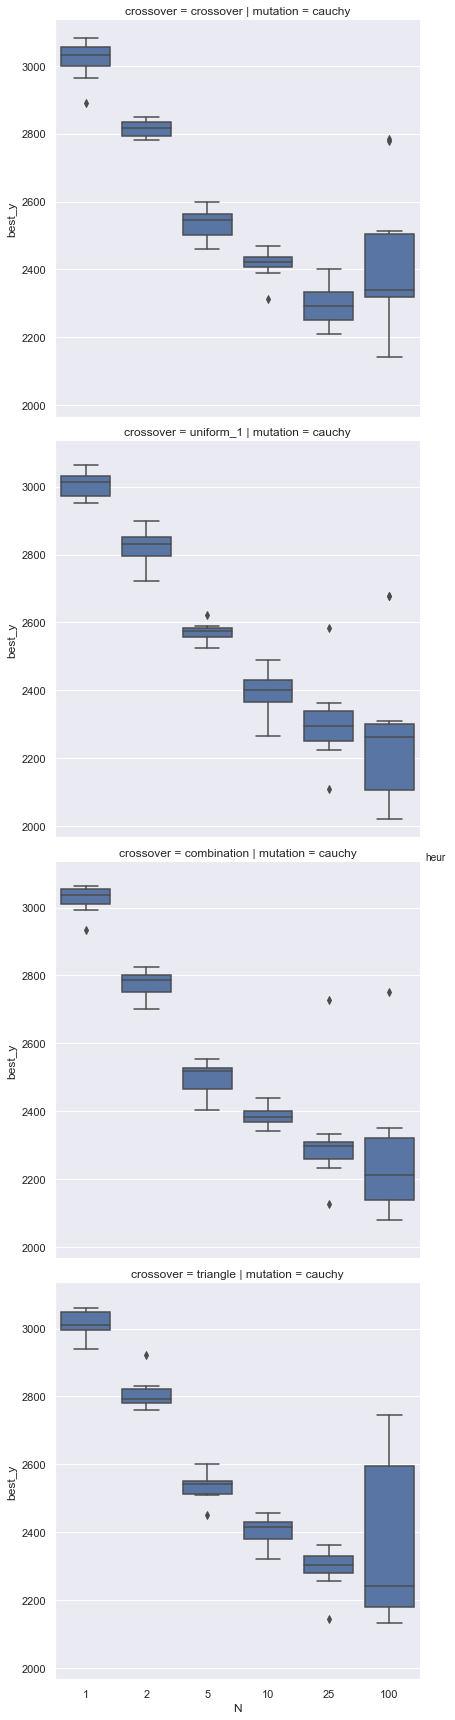

In [25]:
g = sns.FacetGrid(table_go, col='mutation', row="crossover", height=6)
ax = g.map(sns.boxplot, 'N', 'best_y').add_legend(title='heur')

### Example result visualisation

In [26]:
go_ex = GeneticOptimization(test_1_4, MAX_EVAL_4*10, N=25, M=75, Tsel1=1, Tsel2=.1, 
                    mutation=CauchyMutation(r=0.75, correction=MirrorCorrection(test_1_4)),
                    crossover=RandomCombination()).search()

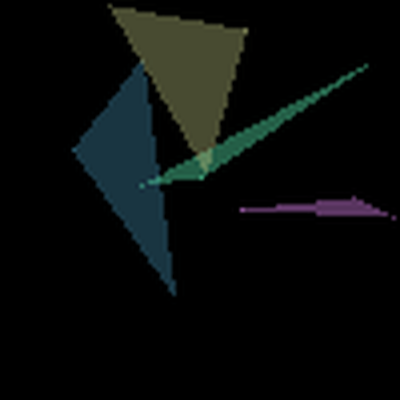

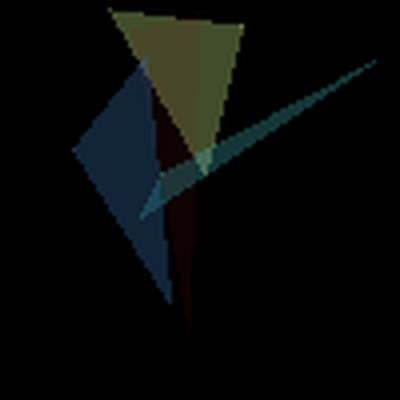

In [27]:
disp(test_1_4.im)
disp(test_1_4.interpret(go_ex["best_x"]))

In [28]:
print("end", datetime.now())

end 2020-06-07 03:52:01.731891
